<a href="https://colab.research.google.com/github/Shashwat-spyder/Netflix-movies-and-tv-shows-recommendation-system/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [956]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [957]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [958]:
netflix_df=pd.read_csv('/content/Drive/My Drive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [959]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [960]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [961]:
netflix_df.shape

(7787, 12)

In [962]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [963]:
df=netflix_df.copy()

# **Data Preprocessing**

Director :

In [964]:
type(df.iloc[1]['director'])

str

In [965]:
df['director']=df['director'].fillna('Other')

In [966]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Other,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [967]:
type(df.iloc[0]['director'])

str

Cast :

In [968]:
type(df.iloc[0]['cast'])

str

In [969]:
df['cast']=df['cast'].fillna('Other')

Country :

In [970]:
type(df.iloc[0]['country'])

str

In [971]:
df['country']=df['country'].fillna('Other')

Date Added :

In [972]:
type(df.iloc[0]['date_added'])

str

In [973]:
df=df.dropna(subset=['date_added'])

In [974]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


rating :

In [975]:
df=df.dropna(subset=['rating'])

In [976]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


Convert string values in director, cast, country and listed_in into list.

In [977]:
df['cast'] = df.cast.apply(lambda x: x[:].split(','))
df['director'] = df.director.apply(lambda x: x[:].split(','))
df['country'] = df.country.apply(lambda x: x[:].split(','))
df['listed_in'] = df.listed_in.apply(lambda x: x[:].split(','))

In [978]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,[Other],"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


In [979]:
df.iloc[0]['cast']

['João Miguel',
 ' Bianca Comparato',
 ' Michel Gomes',
 ' Rodolfo Valente',
 ' Vaneza Oliveira',
 ' Rafael Lozano',
 ' Viviane Porto',
 ' Mel Fronckowiak',
 ' Sergio Mamberti',
 ' Zezé Motta',
 ' Celso Frateschi']

In [980]:
cast_list=[]
for value in df['cast']:
  for elem in value:
    cast_list.append(elem)

print(len(set(cast_list)))

35326


There are 35326 cast members. So we can ignore this or we can consider the primary/ first cast member from the available cast.

In [981]:
director_list=[]
for value in df['director']:
  for elem in value:
    director_list.append(elem)

print(len(set(director_list)))

4581


In [982]:
country_list=[]
for value in df['country']:
  for elem in value:
    country_list.append(elem)

print(len(set(country_list)))
d=np.array(country_list)

189


In [983]:
listedin_list=[]
for value in df['listed_in']:
  for elem in value:
    listedin_list.append(elem)

print(len(set(listedin_list)))

73


In [984]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

Since Director, cast, country has a large number of values we will consider only primary director, lead cast and prime country values. Also we will implement one hot encoding for listed_in and rating columns.

In [985]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# **Feature Engineering**

Cast, country and director has been reassigned the primary value among the list of values which is the first index value of the row of that particular column.

In [986]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,[Other],"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,[Jorge Michel Grau],"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,[Gilbert Chan],"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,[Shane Acker],"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,[Robert Luketic],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


In [987]:
df['cast'] = df['cast'].map(lambda cast: cast[0] if len(cast[0])>1 else cast)
df['director'] = df['director'].map(lambda director: director[0] if len(director[0])>1 else director)
df['country'] = df['country'].map(lambda country: country[0] if len(country[0])>1 else country)

In [988]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,Imad Creidi,Sweden,"October 19, 2020",2005,TV-MA,99 min,"[Dramas, International Movies]",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,Vicky Kaushal,India,"March 2, 2019",2015,TV-14,111 min,"[Dramas, International Movies, Music & Music...",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Other,Nasty C,Other,"September 25, 2020",2019,TV-MA,44 min,"[Documentaries, International Movies, Music ...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Other,Adriano Zumbo,Australia,"October 31, 2020",2019,TV-PG,1 Season,"[International TV Shows, Reality TV]",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Other,United Kingdom,"March 1, 2020",2019,TV-MA,90 min,"[Documentaries, Music & Musicals]",This documentary delves into the mystique behi...


In [989]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...


Now we will perform one hot encoding on the list_in column. As it has multiple values we will be doing a special type of one hot encoding called MultiLevel Binarizer

listed_in :

In [990]:
# Create the MultiLabelBinarizer 
mlb = MultiLabelBinarizer()

# Encode each genre and join to dataframe
mlb_df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('listed_in')),
                                              columns=mlb.classes_,
                                              index=df.index))

In [991]:
mlb.classes_

array([' Anime Features', ' Children & Family Movies',
       ' Classic & Cult TV', ' Classic Movies', ' Comedies',
       ' Crime TV Shows', ' Cult Movies', ' Documentaries', ' Docuseries',
       ' Dramas', ' Faith & Spirituality', ' Horror Movies',
       ' Independent Movies', ' International Movies',
       ' International TV Shows', " Kids' TV", ' Korean TV Shows',
       ' LGBTQ Movies', ' Music & Musicals', ' Reality TV',
       ' Romantic Movies', ' Romantic TV Shows', ' Sci-Fi & Fantasy',
       ' Science & Nature TV', ' Spanish-Language TV Shows',
       ' Sports Movies', ' Stand-Up Comedy',
       ' Stand-Up Comedy & Talk Shows', ' TV Action & Adventure',
       ' TV Comedies', ' TV Dramas', ' TV Horror', ' TV Mysteries',
       ' TV Sci-Fi & Fantasy', ' TV Thrillers', ' Teen TV Shows',
       ' Thrillers', 'Action & Adventure', 'Anime Features',
       'Anime Series', 'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',


In [992]:
# Apply one-hot encoder to rating column
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

all_ratings = df['rating'].unique()

OH_rating = pd.DataFrame(OH_encoder.fit_transform(mlb_df[['rating']]), columns=all_ratings)

# One-hot encoding removed index; put it back
OH_rating.index = mlb_df.index

# Add one-hot encoded columns to data frame
mlb_df = mlb_df.join(OH_rating)

In [993]:
# !pip install category_encoders

In [994]:
mlb_df.shape

(7770, 98)

In [995]:
mlb_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'description', ' Anime Features',
       ' Children & Family Movies', ' Classic & Cult TV', ' Classic Movies',
       ' Comedies', ' Crime TV Shows', ' Cult Movies', ' Documentaries',
       ' Docuseries', ' Dramas', ' Faith & Spirituality', ' Horror Movies',
       ' Independent Movies', ' International Movies',
       ' International TV Shows', ' Kids' TV', ' Korean TV Shows',
       ' LGBTQ Movies', ' Music & Musicals', ' Reality TV', ' Romantic Movies',
       ' Romantic TV Shows', ' Sci-Fi & Fantasy', ' Science & Nature TV',
       ' Spanish-Language TV Shows', ' Sports Movies', ' Stand-Up Comedy',
       ' Stand-Up Comedy & Talk Shows', ' TV Action & Adventure',
       ' TV Comedies', ' TV Dramas', ' TV Horror', ' TV Mysteries',
       ' TV Sci-Fi & Fantasy', ' TV Thrillers', ' Teen TV Shows', ' Thrillers',
       'Action & Adventure', 'Anime Features', 'An

In [996]:
mlb_df.drop(['director','cast','country'], axis=1)

,show_id,type,title,date_added,release_year,rating,duration,description,Anime Features,Children & Family Movies,...,TV-PG,NR,TV-G,TV-Y,TV-Y7,PG,G,NC-17,TV-Y7-FV,UR
0,s1,TV Show,3%,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,s2,Movie,7:19,"December 23, 2016",2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,s3,Movie,23:59,"December 20, 2018",2011,R,78 min,"When an army recruit is found dead, his fellow...",0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,Movie,9,"November 16, 2017",2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi...",0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s5,Movie,21,"January 1, 2020",2008,PG-13,123 min,A brilliant group of students become card-coun...,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"October 19, 2020",2005,TV-MA,99 min,When Lebanon's Civil War deprives Zozo of his ...,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7783,s7784,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,s7785,Movie,Zulu Man in Japan,"September 25, 2020",2019,TV-MA,44 min,"In this documentary, South African rapper Nast...",0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7785,s7786,TV Show,Zumbo's Just Desserts,"October 31, 2020",2019,TV-PG,1 Season,Dessert wizard Adriano Zumbo looks for the nex...,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# **From Fresh**

In [997]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,A brilliant group of students become card-coun...


In [998]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

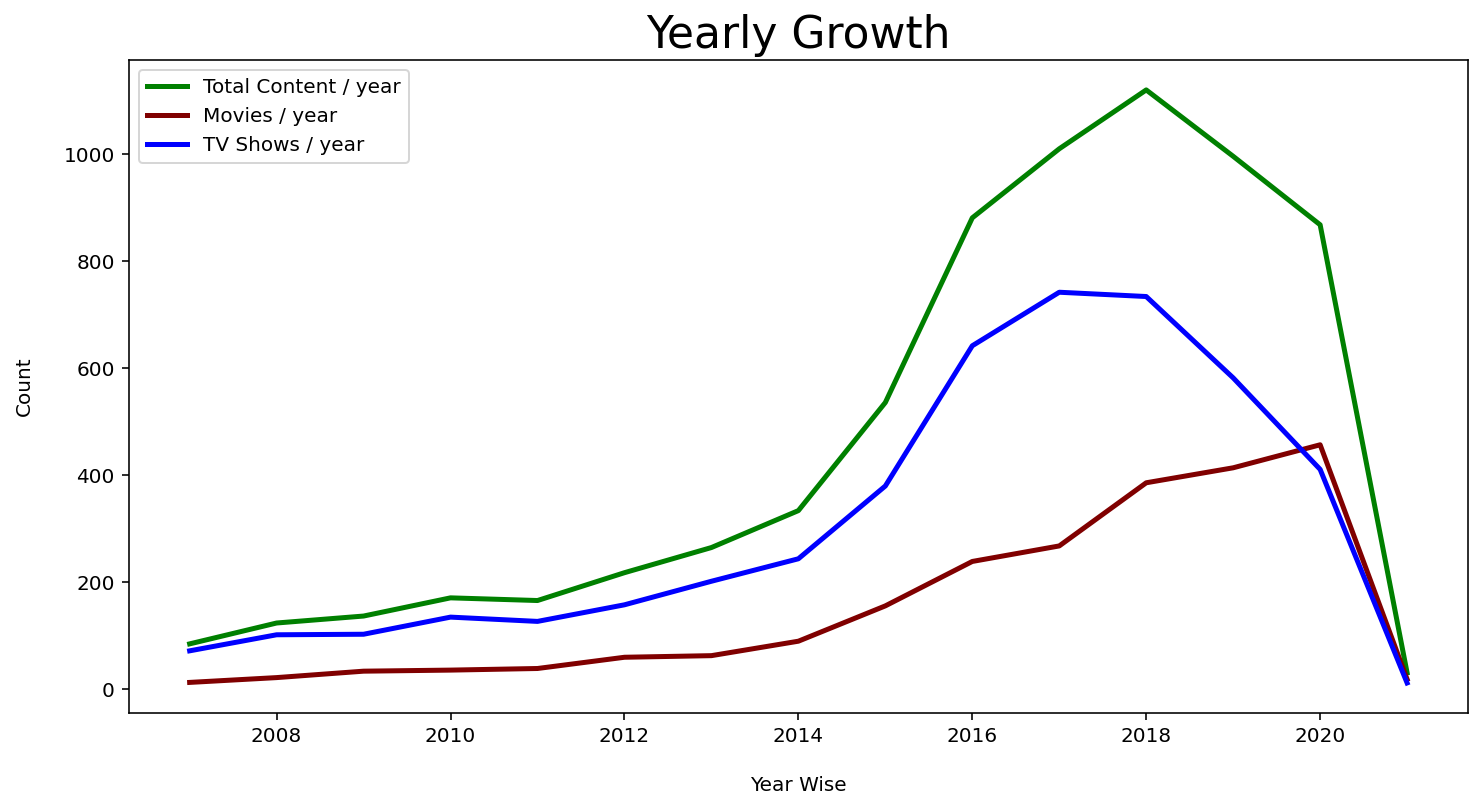

In [999]:
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Year Wise", labelpad=15)
plt.ylabel("Count", labelpad=15)
plt.legend()
plt.title("Yearly Growth",fontsize=22);

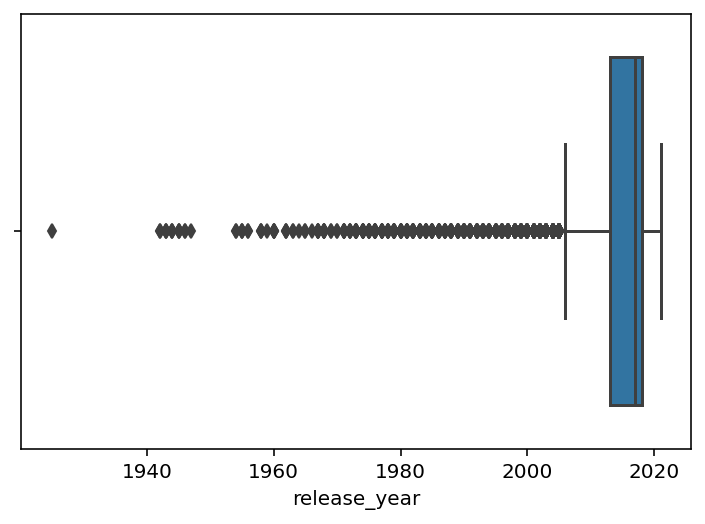

In [1000]:
sns.boxplot('release_year', data=df)

We can clearly see a lot of outliers toward the left side. this also means that the data is left/ negative skewed.

In [1001]:
df['release_year'].skew()

-3.618875684904737

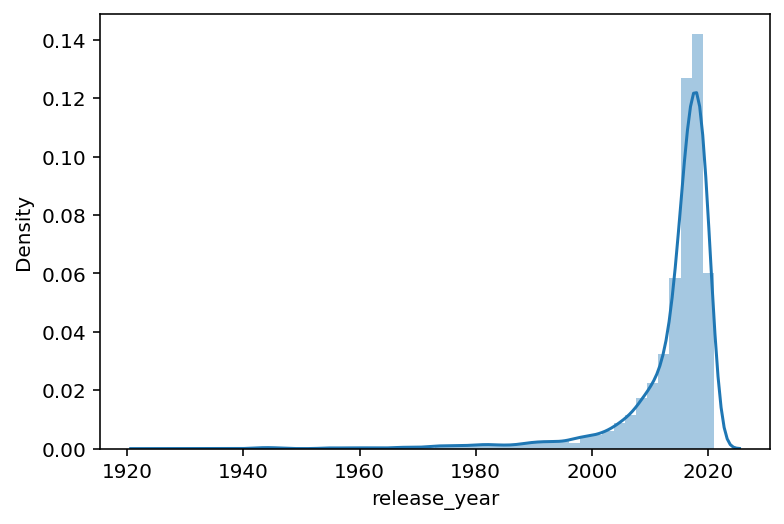

In [1002]:
sns.distplot(df['release_year'])

Lets perform IQR method to remove the outliers.

In [1003]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [1004]:
df['release_year'].value_counts()

2018    1120
2017    1010
2019     996
2016     881
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

In [1005]:
df=df[df['release_year']>=(release_year_Q1-release_year_IQR)]
df= df[df['release_year']<=(release_year_Q3+release_year_IQR)]

In [1006]:
df['release_year'].value_counts()

2018    1120
2017    1010
2019     996
2016     881
2020     868
2015     536
2014     334
2013     265
2012     218
2010     171
2011     166
2009     137
2008     124
2021      31
Name: release_year, dtype: int64

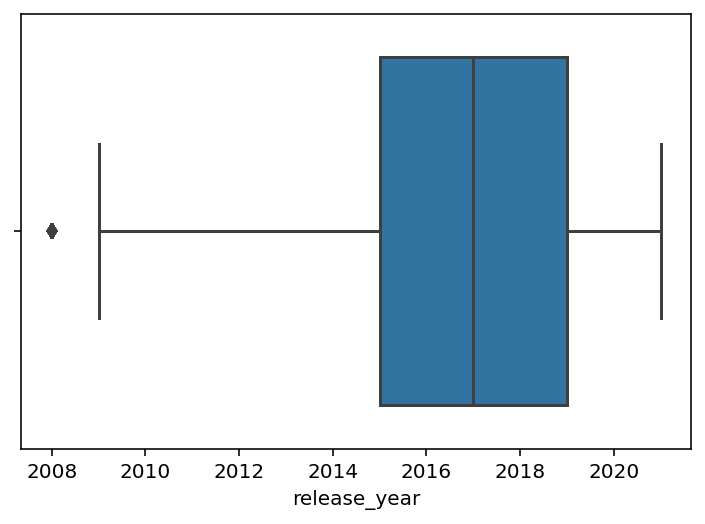

In [1007]:
sns.boxplot(df['release_year'])

We can clearly see that all the ouliers have been removed.

In [1008]:
df.shape

(6857, 11)

Convert season to minutes for duration labeled column in df.

Duration :

In [1009]:
df['duration'].value_counts()

1 Season      1541
2 Seasons      367
3 Seasons      179
90 min         123
91 min         114
              ... 
179 min          1
16 Seasons       1
8 min            1
43 min           1
203 min          1
Name: duration, Length: 191, dtype: int64

In [1010]:
def season_to_min(value):
  no_of_avg_ep=5
  runtime_each_ep=55
  if 'Seasons' in value:
    value = value.replace("Seasons",'')
    value = value.replace(" ","")
    total_seasons = int(value)
    each_season_mins = ( no_of_avg_ep * 55 )
    total_mins = (total_seasons * each_season_mins)
    return total_mins
  if 'Season' in value:
    total_mins = (no_of_avg_ep * runtime_each_ep)
    return total_mins
  else:
    value = value.replace("min",'')
    value = value.replace(" ","")
    value=int(value)
    return value



In [1011]:
df['duration']=df['duration'].apply(lambda x: season_to_min(x))

In [1012]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,1100,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,Erdal Beşikçioğlu,Turkey,"July 1, 2017",2016,TV-MA,275,A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,Amina Khalil,Egypt,"June 1, 2020",2019,TV-MA,95,"After an awful accident, a couple admitted to ..."
8,s9,Movie,706,Shravan Kumar,Divya Dutta,India,"April 1, 2019",2019,TV-14,118,"When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,Rajneesh Duggal,India,"December 15, 2017",2008,TV-MA,143,An architect and his wife move into a castle t...
10,s11,Movie,1922,Zak Hilditch,Thomas Jane,United States,"October 20, 2017",2017,TV-MA,103,A farmer pens a confession admitting to his wi...


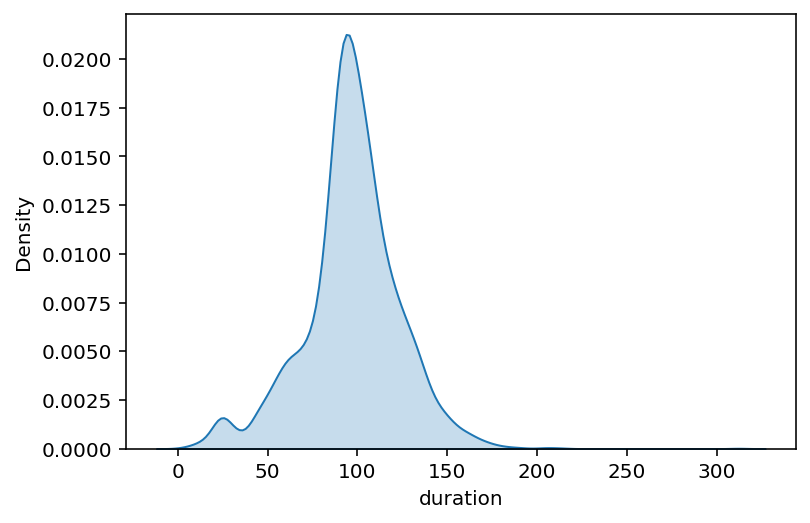

In [1013]:
sns.kdeplot(data = df.duration[df['type'] == 'Movie'] , shade=True)

Most movies are about 100 minutes.

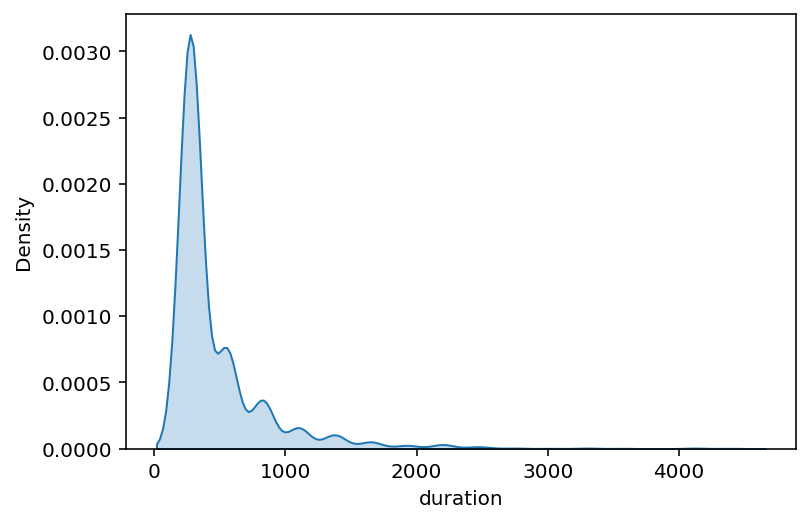

In [1014]:
sns.kdeplot(data = df.duration[df['type'] == 'TV Show'] , shade=True)

In [1015]:
df[df['type']=='TV Show']['duration'].value_counts().sort_values(ascending=False).head(5)

275     1541
550      367
825      179
1100      77
1375      51
Name: duration, dtype: int64

Most TV shows are 275 minutes in duration which is the equivalent of 1 season.

Date Added :

In [1016]:
type(df.iloc[0]['date_added'])

str

The date_added column is in incorrect format. The type should be in datetime format.

In [1017]:
df.iloc[0]['date_added']

'August 14, 2020'

In [1018]:
import datetime
 
# Function to convert string to datetime
def convert(date_time):
  try:
    format = ' %B %d, %Y'  # The format %B %d, %Y
    datetime_str = datetime.datetime.strptime(date_time, format)
  except:
    format = '%B %d, %Y'  # The format %B %d, %Y
    datetime_str = datetime.datetime.strptime(date_time, format)
 
    return datetime_str

In [1019]:
df['date_added']=df['date_added'].apply(convert)

In [1020]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14,2020,TV-MA,1100,In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23,2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20,2011,R,78,"When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16,2009,PG-13,80,"In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01,2008,PG-13,123,A brilliant group of students become card-coun...


In [1021]:
df['year'] = pd.DatetimeIndex(df['date_added']).year
df['month']=pd.DatetimeIndex(df['date_added']).month
df['date']=pd.DatetimeIndex(df['date_added']).day_name()

In [1022]:
df['year'].fillna(2010)

0       2020.0
1       2016.0
2       2018.0
3       2017.0
4       2020.0
         ...  
7780    2018.0
7783    2019.0
7784    2020.0
7785    2020.0
7786    2020.0
Name: year, Length: 6857, dtype: float64

In [1023]:
df[df['year'].isna()]=2010

In [1024]:
df['year'].unique()

array([2020., 2016., 2018., 2017., 2019., 2021., 2015., 2013., 2010.,
       2012., 2014., 2011., 2009.])

In [1025]:
df['year']=df['year'].astype(np.int64)
df['month']=df['month'].astype(np.int64)

In [1026]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year,month,date
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020,TV-MA,1100,In a future where the elite inhabit an island ...,2020,8,Friday
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...,2016,12,Friday
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011,R,78,"When an army recruit is found dead, his fellow...",2018,12,Thursday
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009,PG-13,80,"In a postapocalyptic world, rag-doll robots hi...",2017,11,Thursday
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008,PG-13,123,A brilliant group of students become card-coun...,2020,1,Wednesday


In [1027]:
df.drop(df[df['type']==2010].index, inplace=True)

In [1028]:
df['type'].value_counts()

Movie      4574
TV Show    2203
Name: type, dtype: int64

In [1029]:
df[['type_movie','show']]=pd.get_dummies(df['type'])

In [1030]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year,month,date,type_movie,show
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020,TV-MA,1100,In a future where the elite inhabit an island ...,2020,8,Friday,0,1
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...,2016,12,Friday,1,0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011,R,78,"When an army recruit is found dead, his fellow...",2018,12,Thursday,1,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009,PG-13,80,"In a postapocalyptic world, rag-doll robots hi...",2017,11,Thursday,1,0
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008,PG-13,123,A brilliant group of students become card-coun...,2020,1,Wednesday,1,0


# **Natural Language Processing**

We will perform NLP on the description column of the netflix dataset.

In [1031]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year,month,date,type_movie,show
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020,TV-MA,1100,In a future where the elite inhabit an island ...,2020,8,Friday,0,1
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...,2016,12,Friday,1,0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011,R,78,"When an army recruit is found dead, his fellow...",2018,12,Thursday,1,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009,PG-13,80,"In a postapocalyptic world, rag-doll robots hi...",2017,11,Thursday,1,0
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008,PG-13,123,A brilliant group of students become card-coun...,2020,1,Wednesday,1,0


In [1032]:
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
%config InlineBackend.figure_format = 'retina'

In [1033]:
df.iloc[0]['description']

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [1034]:
def remove_punctuation(text):
  '''Function to remove punctuations'''
  # replacing the punctuations with no space, 
  # which in effect deletes the punctuation marks
  translator=str.maketrans('', '',string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [1035]:
#Applying the function to each example
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year,month,date,type_movie,show
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020,TV-MA,1100,In a future where the elite inhabit an island ...,2020,8,Friday,0,1
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016,TV-MA,93,After a devastating earthquake hits Mexico Cit...,2016,12,Friday,1,0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011,R,78,When an army recruit is found dead his fellow ...,2018,12,Thursday,1,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009,PG-13,80,In a postapocalyptic world ragdoll robots hide...,2017,11,Thursday,1,0
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008,PG-13,123,A brilliant group of students become cardcount...,2020,1,Wednesday,1,0


In [1036]:
df.iloc[0]['description']

'In a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the 3 saved from squalor'

As one can see the percentile is removed from the above description.

# **Remove Stopwords**

In [1037]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1038]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [1039]:
print('Number of stop words = {}'.format(len(sw)))

Number of stop words = 179


In [1040]:
#Removing stopwords
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [1041]:
#applying the stopwords removal function
df['description'] = df['description'].apply(stopwords)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year,month,date,type_movie,show
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020,TV-MA,1100,future elite inhabit island paradise far crowd...,2020,8,Friday,0,1
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016,TV-MA,93,devastating earthquake hits mexico city trappe...,2016,12,Friday,1,0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011,R,78,army recruit found dead fellow soldiers forced...,2018,12,Thursday,1,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009,PG-13,80,postapocalyptic world ragdoll robots hide fear...,2017,11,Thursday,1,0
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008,PG-13,123,brilliant group students become cardcounting e...,2020,1,Wednesday,1,0
5,s6,TV Show,46,Serdar Akar,Erdal Beşikçioğlu,Turkey,2017-07-01 00:00:00,2016,TV-MA,275,genetics professor experiments treatment comat...,2017,7,Saturday,0,1
6,s7,Movie,122,Yasir Al Yasiri,Amina Khalil,Egypt,2020-06-01 00:00:00,2019,TV-MA,95,awful accident couple admitted grisly hospital...,2020,6,Monday,1,0
8,s9,Movie,706,Shravan Kumar,Divya Dutta,India,2019-04-01 00:00:00,2019,TV-14,118,doctor goes missing psychiatrist wife treats b...,2019,4,Monday,1,0
9,s10,Movie,1920,Vikram Bhatt,Rajneesh Duggal,India,2017-12-15 00:00:00,2008,TV-MA,143,architect wife move castle slated become luxur...,2017,12,Friday,1,0
10,s11,Movie,1922,Zak Hilditch,Thomas Jane,United States,2017-10-20 00:00:00,2017,TV-MA,103,farmer pens confession admitting wifes murder ...,2017,10,Friday,1,0


In [1042]:
df.iloc[0]['description']

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

All the stopwords have been removed from the description column.

# **Collect Vocabulary Count**

In [1043]:
# # create a count vectorizer object
# count_vectorizer = CountVectorizer()
# # fit the count vectorizer using the text data
# count_vectorizer.fit(df['description'])
# # collect the vocabulary items used in the vectorizer
# word_dictionary = count_vectorizer.vocabulary_.items()

In [1044]:
# word_dictionary

In [1045]:
# #Storing vocab and the counts in list
# vocab = []
# count = []
# # iterate through each vocab and count append the value to designated lists
# for key, value in word_dictionary:
#     vocab.append(key)
#     count.append(value)
# # store the count in panadas dataframe with vocab as index
# vocab_bef_stem = pd.Series(count, index=vocab)
# # sort the dataframe
# vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [1046]:
# top_vacab = vocab_bef_stem.head(20)
# top_vacab.plot(kind = 'barh', figsize=(5,10))

We see that a weighted approach is required. We can use any of the following : TF, DF or IDF.

In [1047]:
# fig = plt.figure(figsize=(10,5),facecolor = 'b',edgecolor = 'r')
# wordcloud = WordCloud(background_color='floralwhite',width=1000, height=500 ).generate(" ".join(vocab))
# plt.imshow(wordcloud,interpolation ='bilinear')
# plt.axis('off')
# plt.tight_layout()
# plt.savefig('country.png')
# plt.show()

# **Stemming operation**

In [1048]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [1049]:
df['description'] = df['description'].apply(stemming)
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,year,month,date,type_movie,show
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020,TV-MA,1100,futur elit inhabit island paradis far crowd sl...,2020,8,Friday,0,1
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016,TV-MA,93,devast earthquak hit mexico citi trap survivor...,2016,12,Friday,1,0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011,R,78,armi recruit found dead fellow soldier forc co...,2018,12,Thursday,1,0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009,PG-13,80,postapocalypt world ragdol robot hide fear dan...,2017,11,Thursday,1,0
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008,PG-13,123,brilliant group student becom cardcount expert...,2020,1,Wednesday,1,0
5,s6,TV Show,46,Serdar Akar,Erdal Beşikçioğlu,Turkey,2017-07-01 00:00:00,2016,TV-MA,275,genet professor experi treatment comatos siste...,2017,7,Saturday,0,1
6,s7,Movie,122,Yasir Al Yasiri,Amina Khalil,Egypt,2020-06-01 00:00:00,2019,TV-MA,95,aw accid coupl admit grisli hospit separ must ...,2020,6,Monday,1,0
8,s9,Movie,706,Shravan Kumar,Divya Dutta,India,2019-04-01 00:00:00,2019,TV-14,118,doctor goe miss psychiatrist wife treat bizarr...,2019,4,Monday,1,0
9,s10,Movie,1920,Vikram Bhatt,Rajneesh Duggal,India,2017-12-15 00:00:00,2008,TV-MA,143,architect wife move castl slate becom luxuri h...,2017,12,Friday,1,0
10,s11,Movie,1922,Zak Hilditch,Thomas Jane,United States,2017-10-20 00:00:00,2017,TV-MA,103,farmer pen confess admit wife murder death beg...,2017,10,Friday,1,0


## **Top words after stemming.**

In [1050]:
# # create the object of tfid vectorizer
# tfid_vectorizer = TfidfVectorizer(stop_words='english')

# # fit the vectorizer using the text data
# tfid_vectorizer.fit(df['description'])

# # collect the vocabulary items used in the vectorizer
# dictionary = tfid_vectorizer.vocabulary_.items()

In [1051]:
# dictionary

In [1052]:
# # lists to store the vocab and counts
# vocab = []
# count = []
# # iterate through each vocab and count append the value to designated lists
# for key, value in dictionary:
#     vocab.append(key)
#     count.append(value)
# # store the count in panadas dataframe with vocab as index
# vocab_after_stem = pd.Series(count, index=vocab)
# # sort the dataframe
# vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# # plot of the top vocab
# top_vacab = vocab_after_stem.head(20)
# top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [1053]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(df['description'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [1054]:
# store the tf-idf array into pandas dataframe
tfid_df = pd.DataFrame(array)
tfid_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,13071,13072,13073,13074,13075,13076,13077,13078,13079,13080
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1055]:
final_df = df.join(pd.DataFrame(tfid_df, columns=mlb.classes_,index=df.index))

In [1056]:
final_df=pd.concat([df, tfid_df], axis=1)

In [1057]:
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,13071,13072,13073,13074,13075,13076,13077,13078,13079,13080
0,s1,TV Show,3%,Other,João Miguel,Brazil,2020-08-14 00:00:00,2020.0,TV-MA,1100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23 00:00:00,2016.0,TV-MA,93.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20 00:00:00,2011.0,R,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16 00:00:00,2009.0,PG-13,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01 00:00:00,2008.0,PG-13,123.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1058]:
final_df.loc[0][:].value_counts()

0.0                                                                                   13070
0.3279285753057746                                                                        2
2020.0                                                                                    2
1.0                                                                                       1
0.2030776395941387                                                                        1
0.22390381301782897                                                                       1
0.2582825579381                                                                           1
0.3123599472096906                                                                        1
0.23786635056902414                                                                       1
0.2916815804707372                                                                        1
0.2598790863812449                                                              

In [1062]:
final_df.shape

(7667, 13097)